# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine


from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download("punkt_tab")

from nltk.corpus import stopwords
from IPython.display import Image

import yake


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
#Choisir une décénie
DECADE = '1920'

#Défnir le chemin
data_path = "../../data/txt/"
txt_path = '../../data/txt'

#charger tous les fichiers de la décénnie et en créer une liste de textes
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]

## Vectoriser les documents à l'aide de TF-IDF

In [7]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

#Instancier le modèle TF-IDF avec ses arguments
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

#Construire la matrice de veceturs à l'aide de la fonction fit-transform
tfidf_vectors = vectorizer.fit_transform(texts)

# Détail de la matrice
tfidf_vectors

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<1000x3982 sparse matrix of type '<class 'numpy.float64'>'
	with 811417 stored elements in Compressed Sparse Row format>

### Tests sur nos documents

In [48]:
tfidf_array = tfidf_vectors.toarray()

In [49]:
cosine(tfidf_array[0], tfidf_array[1])

0.8926619422735202

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

### Définir un nombre de clusters

In [81]:
#Définir le nombre de cluster
N_CLUSTERS = 4

#Instancier le modèle K-means et ses arguments
km_model = KMeans(n_clusters=N_CLUSTERS)

#appliquer le clustering à l'aide de la fonction fit_predict
clusters = km_model.fit_predict(tfidf_vectors)

clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])



## Visualiser les clusters

In [82]:
#Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

reduced_vectors[:50]

array([[ 0.18320694, -0.24440519],
       [-0.10203273, -0.02854454],
       [-0.31081116,  0.19115844],
       [-0.31197683,  0.17964744],
       [-0.17986557, -0.03288065],
       [ 0.61165772,  0.36934974],
       [ 0.12138147, -0.36993699],
       [-0.11887868, -0.1552884 ],
       [-0.29834906,  0.16660671],
       [ 0.0246944 , -0.25078618],
       [-0.08081607, -0.2145532 ],
       [ 0.23014646, -0.3680381 ],
       [ 0.00073434, -0.30889216],
       [-0.32091458,  0.19977696],
       [-0.16261774, -0.0192035 ],
       [-0.32199164,  0.20483706],
       [-0.32669865,  0.21085628],
       [-0.27991935,  0.12358245],
       [-0.15468608, -0.06879543],
       [-0.32772546,  0.19849105],
       [-0.19647884, -0.00667688],
       [-0.3307241 ,  0.21705559],
       [-0.29126662,  0.11191213],
       [-0.29419544,  0.16266532],
       [-0.04410678, -0.16995352],
       [ 0.51472639,  0.18547373],
       [ 0.32044014,  0.039486  ],
       [-0.28278582,  0.11765225],
       [-0.30753652,

In [83]:
reduced_vectors[:10]

array([[ 0.18320694, -0.24440519],
       [-0.10203273, -0.02854454],
       [-0.31081116,  0.19115844],
       [-0.31197683,  0.17964744],
       [-0.17986557, -0.03288065],
       [ 0.61165772,  0.36934974],
       [ 0.12138147, -0.36993699],
       [-0.11887868, -0.1552884 ],
       [-0.29834906,  0.16660671],
       [ 0.0246944 , -0.25078618]])

### Générer le plot

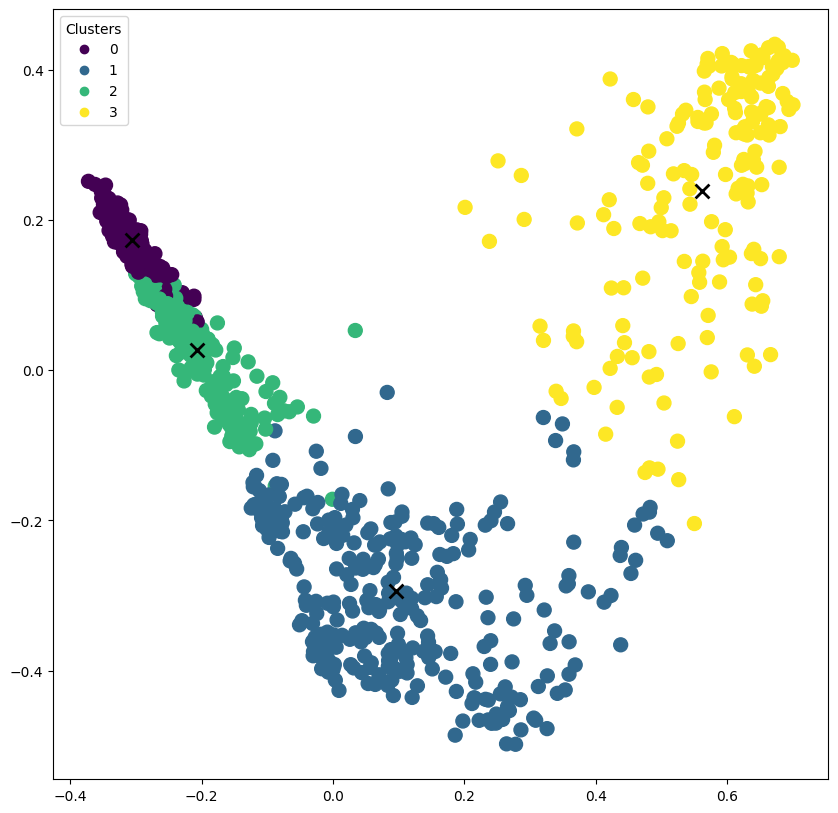

In [84]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

# Analyse des Clusters

In [85]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=50,n=2)

# Parcourir les clusters
for cluster_id in range(N_CLUSTERS):

    print(f"\n===== CLUSTER {cluster_id} =====")

    # Récupérer les textes du cluster
    file_list = clustering[cluster_id]   # liste des fichiers appartenant au cluster
    if len(file_list) == 0:
        print("(Cluster vide)")
        continue

    # Concaténer tout le texte du cluster
    cluster_text = ""
    for filename in file_list:
        with open(os.path.join(data_path, filename), "r", encoding="utf-8") as f:
            cluster_text += " " + f.read()

    #  Extraire les mots-clés du cluster 
    keywords = kw_extractor.extract_keywords(cluster_text)

    # Garder uniquement les bigrammes (sécurité)
    bigrams = [kw for kw, score in keywords if len(kw.split()) == 2]

    print("Keywords (bigrames) :", ", ".join(bigrams[:20]))  # top 20


===== CLUSTER 0 =====
Keywords (bigrames) : Agence Rossel, rue Van, rue Neuve, rue Royale, maison rue, demande place, belle maison, rue Haute, louer maison, demande fille, nous nous, jeune fille, grande maison, bonne maison, louer rue, RENTIER rue, Jeune homme, demande bonne, jolie maison, place fille

===== CLUSTER 1 =====
Keywords (bigrames) : Agence Rossel, rue Van, rue Royale, demande place, rue Neuve, Belle maison, louer maison, rue Haute, demande fille, maison rue, jeune fille, demande bonne, bonne maison, Bruxelles rue, jolie maison, demande servante, grande maison, louer rue, place fille, rue Joseph

===== CLUSTER 2 =====
Keywords (bigrames) : AGENCE ROSSEL, rue Van, rue Royale, demande place, rue Haute, rue Neuve, MAISON rue, louer maison, demande fille, belle maison, Bruxelles rue, bonne maison, Grande maison, louer rue, jeune fille, demande bonne, jolie maison, hier soir, place fille, rue Joseph

===== CLUSTER 3 =====
Keywords (bigrames) : rue Royale, rue Van, rue Neuve, Ag

Analyse des Keywords sur l'ensemble de la décénnie


[('ANVERS', 4293), ('PARIS', 3710), ('FRANCE', 2597), ('SOCIÉTÉ', 2586), ('COURANT', 2532), ('HOMME', 2454), ('CENT', 2391), ('GUERRE', 2360), ('MARCHÉ', 2265), ('GARE', 2156), ('GÉNÉRAL', 2150), ('GOUVERNEMENT', 2132), ('PREMIÈRE', 2048), ('LONDRES', 2047), ('DEMI', 2027), ('LOUISE', 2001), ('PLACES', 1991), ('BOURSE', 1969), ('BAS', 1964), ('SERVICE', 1955), ('PRÉSENTER', 1949), ('ART', 1931), ('MARS', 1914), ('ANGLAIS', 1887), ('BONNES', 1876), ('LIÈGE', 1858), ('POINT', 1853), ('MINISTRE', 1844), ('SEUL', 1841), ('AVRIL', 1829), ('GAGES', 1822), ('PRÉSIDENT', 1821), ('DEVANT', 1782), ('PETITE', 1766), ('BOULEVARD', 1765), ('LOI', 1764), ('FOIS', 1761), ('ROYALE', 1747), ('FORT', 1728), ('OUVRIER', 1717), ('RÉFÉRENCES', 1697), ('CONGO', 1686), ('CONSEIL', 1678), ('DEMANDÉ', 1666), ('FIN', 1664), ('TOUJOURS', 1660), ('CHÊNE', 1657), ('VIE', 1649), ('BELGES', 1644), ('MÉNAGE', 1642), ('IXELLES', 1639), ('UNION', 1633), ('RENTIER', 1624), ('ANNÉE', 1606), ('ROI', 1603), ('QUARTIER', 15

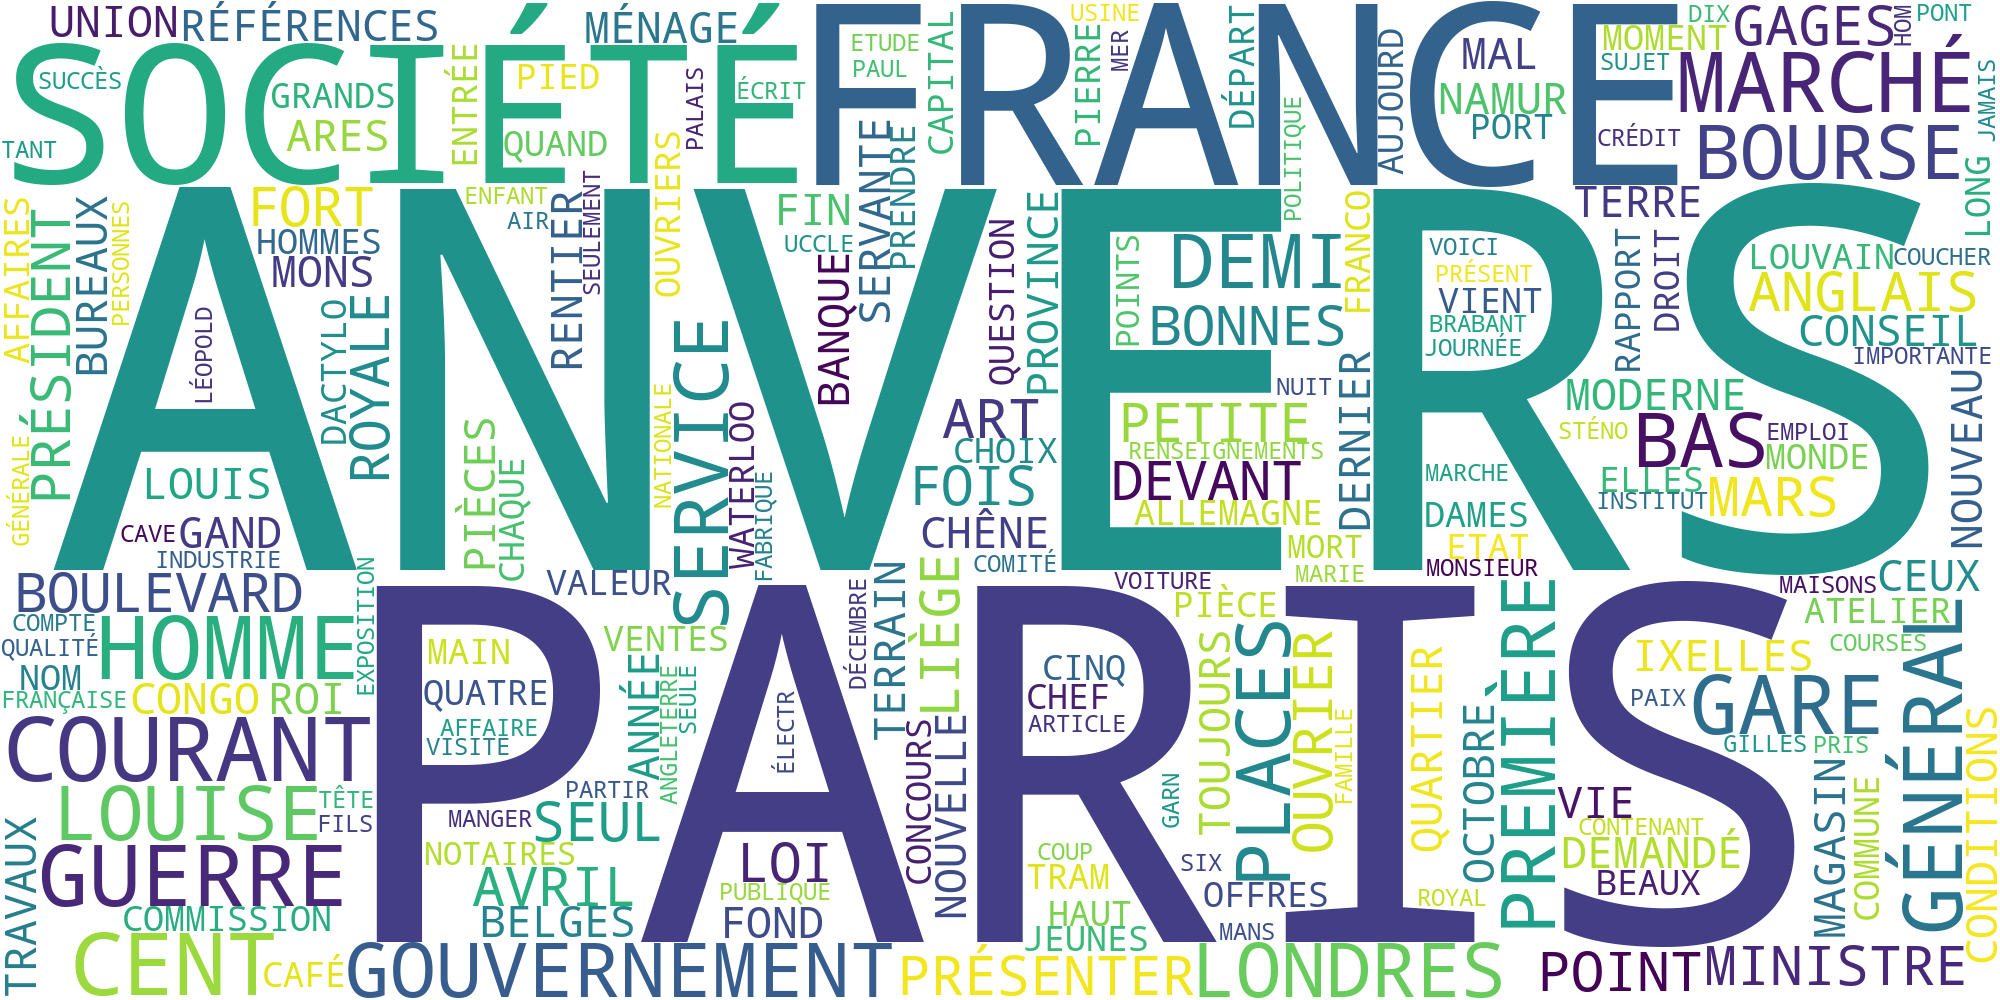

In [55]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for f in files:
    with open(os.path.join(txt_path, f), 'r', encoding='utf-8') as file:
        content_list.append(file.read())


# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{DECADE}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

# Stocker le contenu complet de la décennie dans un fichier
decade_file = os.path.join(temp_path, f"{DECADE}.txt")
with open(decade_file, "w", encoding="utf-8") as f:
    f.write(" ".join(texts))



# Stopwords décennie 1920
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "rue", "prix", "maison", 
       "an", "agence", "louer","très", "vendre", "bon", "heure", "place", "demande", "ecr", 
       "francs", "grand", "midi", "état", "vend", "belle", "ruo", "avenue", "brux", "nord",
       "fille", "gaz", "bonne", "adr", "vente",  "etc", "neuf", "bon", "libre", "mod", 
       "jours", "mois", "salle", "chambre", "eau", "app", "dés", "près", "grand", "grande", 
       "un", "une", "tél", "occasion", "matin", "soir", "beau", "on", "auto", "tout", "toute",
       "bail", "avant", "après", "jeune", "vieux", "disp", "belge", "belgique", "cuis", "villa",
       "cour", "notaire", "cours", "bel","pers", "bureau", "quart", "pays", "suite", "cap", "peu", 
       "situation", "garage", "mai", "gros", "rossel", "ros", "chez", "centre", "lundi", "mardi", 
       "mercredi", "jeudi", "vendredi", "samedi", "dimanche",  "fer", "mr", "mme", "hôtel", "jardin", 
       "jard", "gar", "porte", "garni", "pension", "bain", "bons", "jour", "écrire", "ans", "part", 
       "ecrire", "heures", "janvier", "lieu", "dame", "par", "rez", "adresser", "loyer", "meuble", 
       "meubles", "bons", "pet", "plusieurs", "neuve", "achat", "mén", "temps", "trav", "sér", 
       "mètres", "lux", "vue", "réf", "ord", "aven", "cherche", "sal", "aveo", "dos", "ler","offre", 
       "petit", "petits", "petites", "lib", "lit", "enf", "fem", "téléphone", "SIT", "faç", "env", 
       "cher","jeu", "jn", "jne", "cause", "mari", "quelques", "quelque", "masmoment", "salon", 
       "chambre", "chambres", "celui", "celle", "lui", "ont", "été", "vers", "pour", "or", "ni", 
       "car", "mais", "où", "et", "enfin", "enfants", "femme", "appart", "lot", "lots", "céder", 
       "prés", "ordre", "bois", "Bruxelles", "Louise", "bruxelles", "chaussée", "français", "conf", 
       "saint", "travail", "alors", "div", "divers", "cas", "dès", "novembre", "septembre", "chamb", 
       "août", "déjà", "téléph", "juin", "hier", "jean", "luxe", "bur", "table", "hui","rent", "commerce",
       "référ", "ire", "con", "étage", "étages", "voir", "sup", "ter", "fit", "juillet", "torpédo", "puis",
       "coin", "premier", "désire", "sach", "int", "trop", "serv", "comm", "com", "février", "min", "max", 
       "cond", "piano", "partie", "club", "rien", "tour", "cuisine", "vis", "leurs"]
sw = set(sw)


#Création fonction de nettoyage

def clean_text(DECADE, folder=None):
    if folder is None:
        input_path = f"{DECADE}.txt"
        output_path = f"{DECADE}_clean.txt"
    else:
        input_path = f"{folder}/{DECADE}.txt"
        output_path = f"{folder}/{DECADE}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

#Appliquer la fonction sur le fichier complet de l'année
clean_text(DECADE, folder=temp_path)

# Vérifier le résultat
with open(os.path.join(temp_path, f'{DECADE}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

#Nuage de mots
##Afficher les termes les plus fréquents

frequencies = Counter(after.split())
print(frequencies.most_common(100))

##Créer, stocker et afficher le nuage de mots
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{DECADE}.png"))
Image(filename=os.path.join(temp_path, f"{DECADE}.png"))

Analyse sur chaque année de la décennie

Année 1920 - 20 mots les plus fréquents : [('ANVERS', 459), ('GUERRE', 429), ('SOCIÉTÉ', 330), ('PARIS', 304), ('GOUVERNEMENT', 293), ('MARS', 279), ('FRANCE', 278), ('COURANT', 268), ('CONSEIL', 264), ('GÉNÉRAL', 260), ('CENT', 259), ('MINISTRE', 254), ('LOI', 253), ('BELGES', 235), ('QUO', 229), ('RUA', 228), ('ANGLAIS', 227), ('PRÉSIDENT', 221), ('MARCHÉ', 218), ('POINT', 213)]


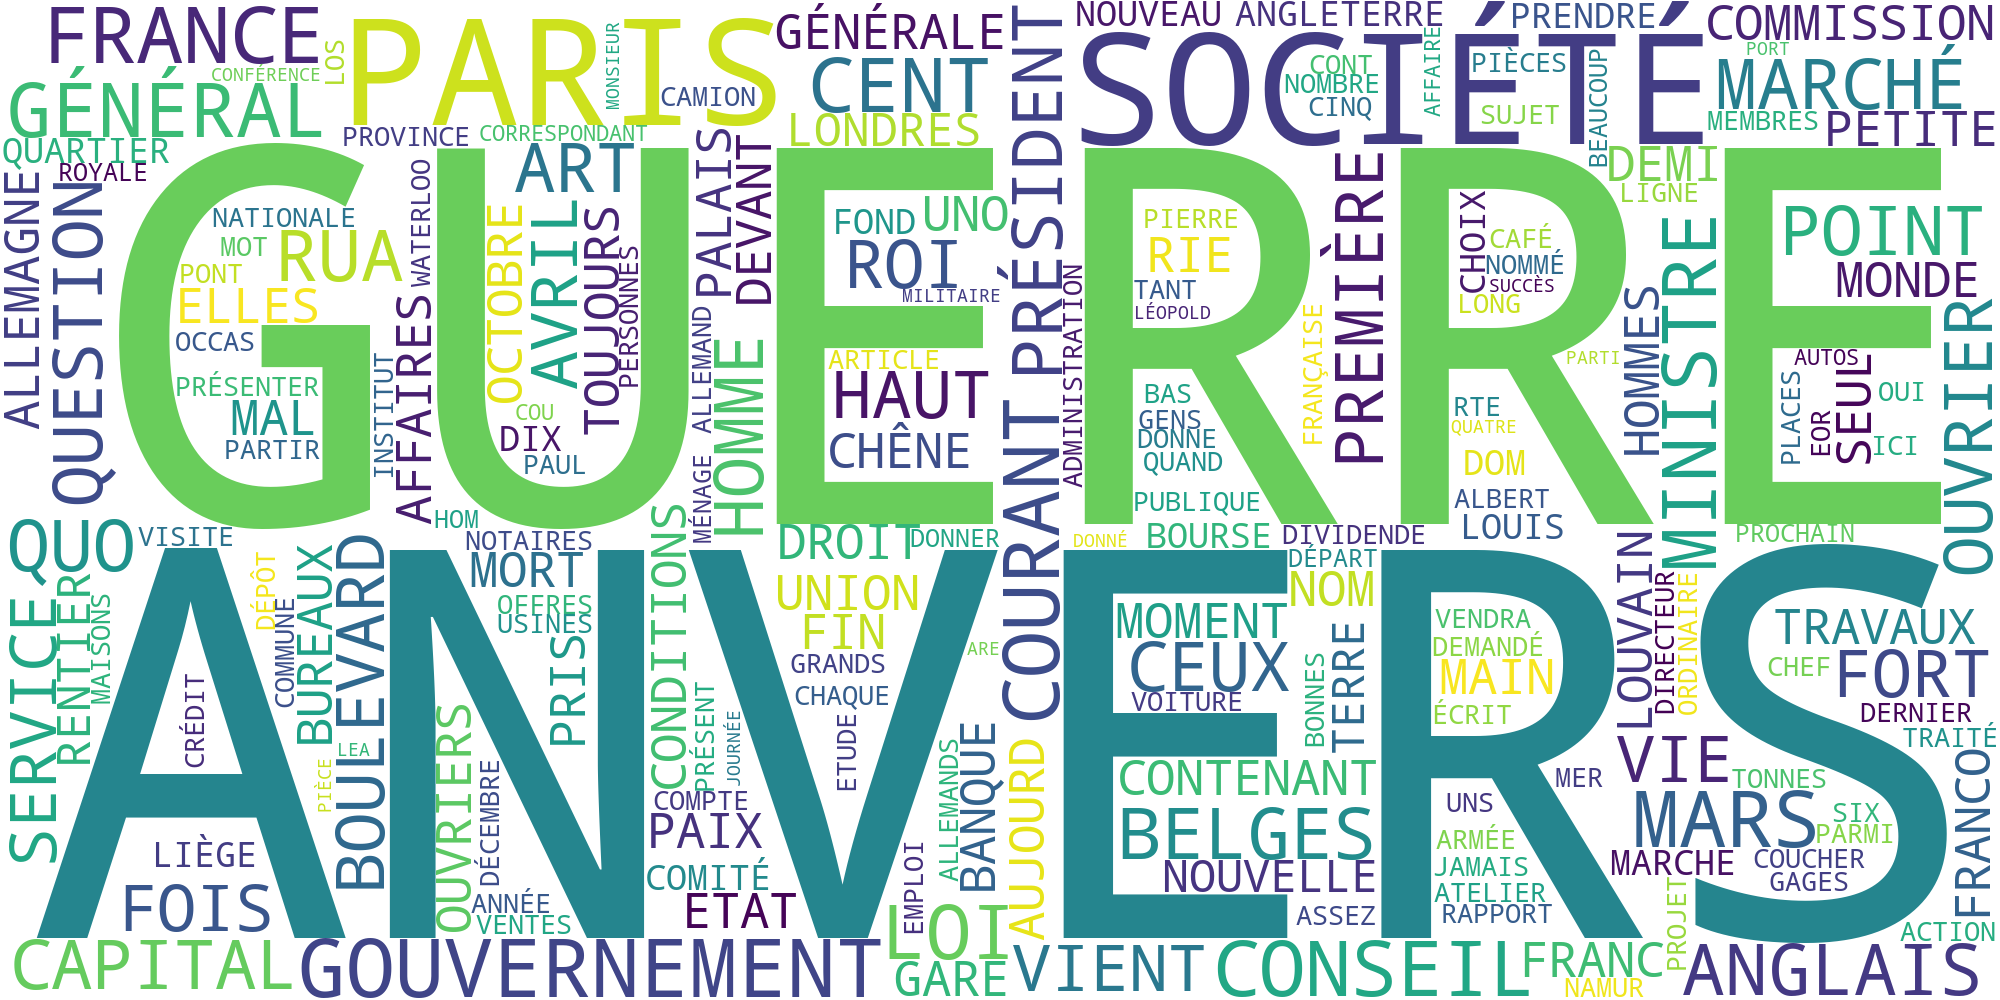

Année 1921 - 20 mots les plus fréquents : [('ANVERS', 441), ('PARIS', 422), ('GUERRE', 412), ('GOUVERNEMENT', 352), ('FRANCE', 338), ('SOCIÉTÉ', 308), ('GAGES', 301), ('ALLEMAGNE', 293), ('MARCHÉ', 282), ('CENT', 270), ('COURANT', 269), ('DEMI', 268), ('GÉNÉRAL', 267), ('HOMME', 267), ('MINISTRE', 261), ('BAS', 255), ('CONSEIL', 253), ('ANGLAIS', 252), ('LONDRES', 249), ('COMMISSION', 247)]


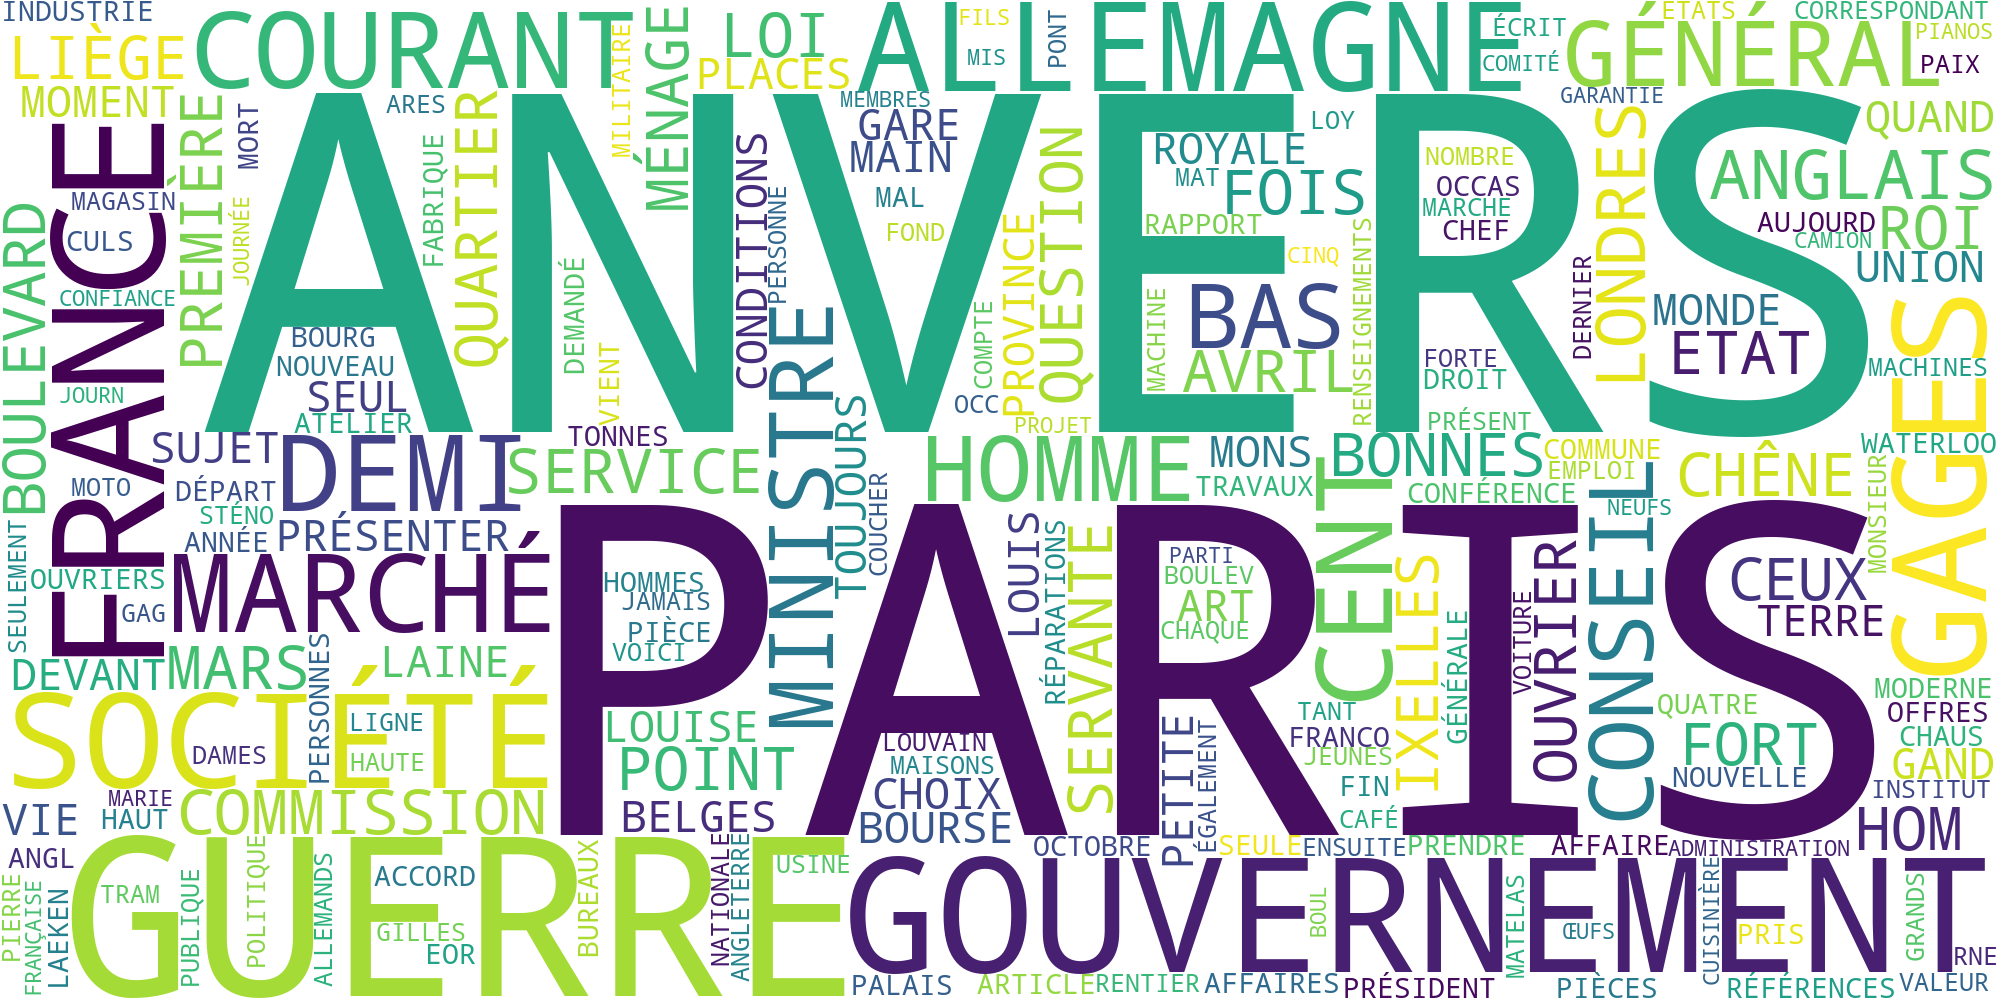

Année 1922 - 20 mots les plus fréquents : [('ANVERS', 384), ('COURANT', 309), ('HOMME', 306), ('CENT', 304), ('PARIS', 281), ('DEMI', 280), ('PRÉSENTER', 252), ('RNE', 242), ('GUERRE', 238), ('SEUL', 238), ('MARCHÉ', 235), ('BONNES', 233), ('GARE', 233), ('ANGLAIS', 232), ('FRANCE', 232), ('OUVRIER', 229), ('SOCIÉTÉ', 221), ('CHÊNE', 219), ('RENTIER', 218), ('FORT', 217)]


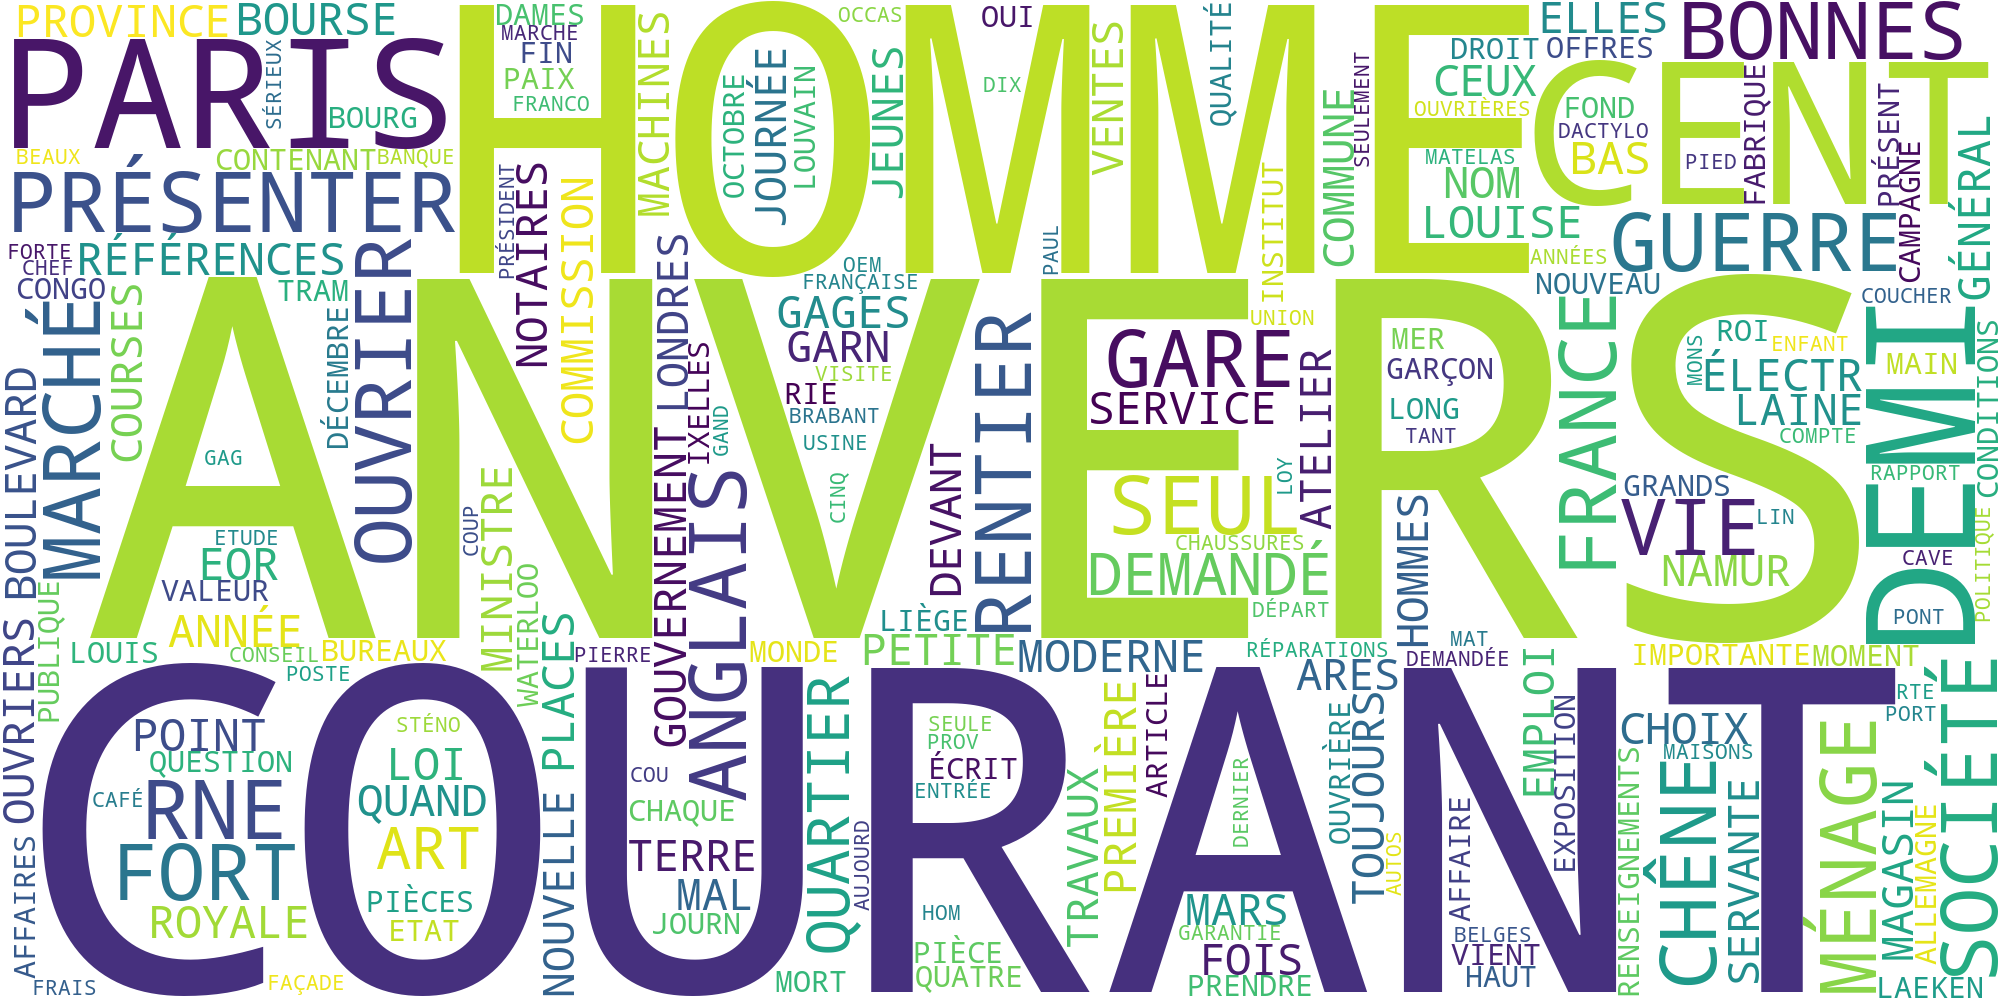

Année 1923 - 20 mots les plus fréquents : [('PARIS', 503), ('FRANCE', 448), ('ANVERS', 362), ('GOUVERNEMENT', 354), ('HOMME', 350), ('COURANT', 343), ('PRÉSENTER', 314), ('SOCIÉTÉ', 290), ('GUERRE', 281), ('GAGES', 279), ('DEMANDÉ', 270), ('DEMI', 266), ('DEVANT', 261), ('GARE', 256), ('PREMIÈRE', 252), ('ANGLAIS', 251), ('MARCHÉ', 250), ('LONDRES', 248), ('SERVICE', 248), ('FOIS', 245)]


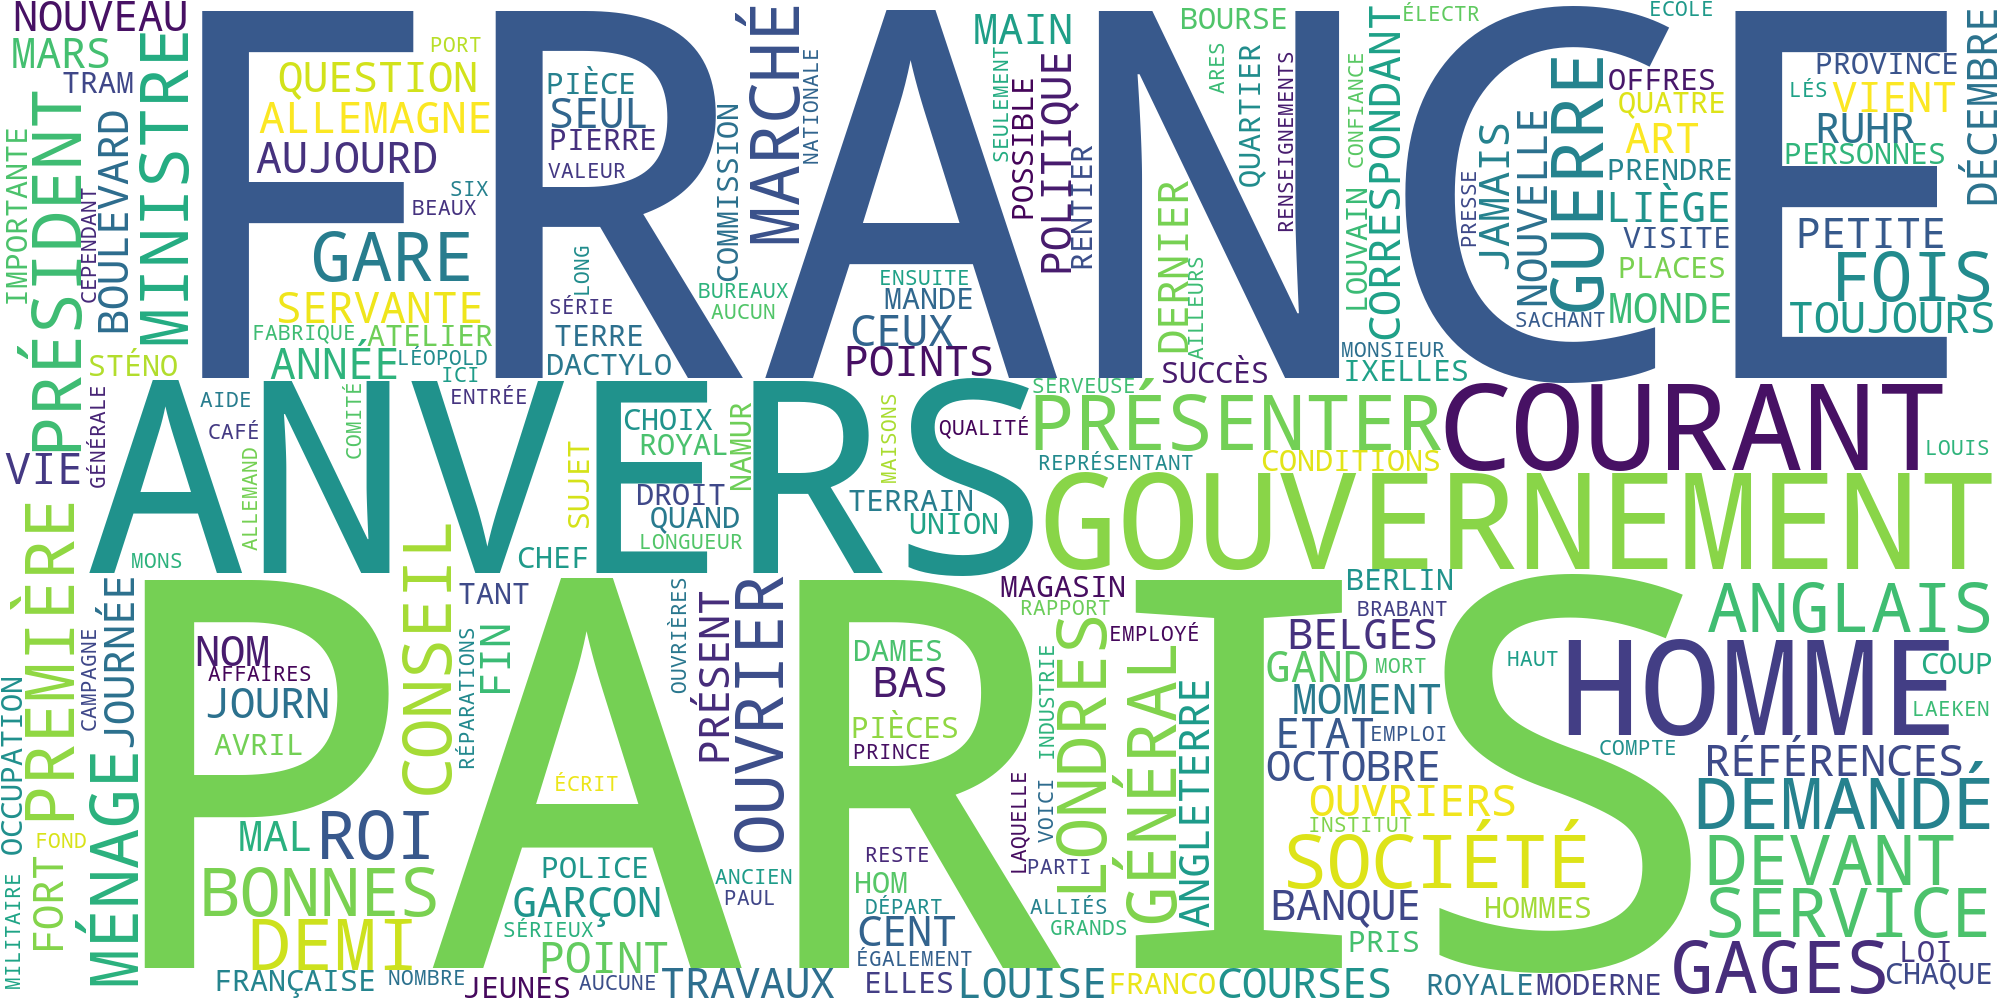

Année 1924 - 20 mots les plus fréquents : [('ANVERS', 442), ('PARIS', 422), ('FRANCE', 345), ('GARE', 278), ('AVRIL', 273), ('LONDRES', 267), ('SOCIÉTÉ', 264), ('GUERRE', 243), ('GÉNÉRAL', 229), ('PLACES', 228), ('PRÉSIDENT', 225), ('COURANT', 221), ('HOMME', 219), ('TERRAIN', 215), ('BOURSE', 210), ('GAGES', 207), ('LIÈGE', 204), ('BELGES', 204), ('GOUVERNEMENT', 203), ('ROYALE', 200)]


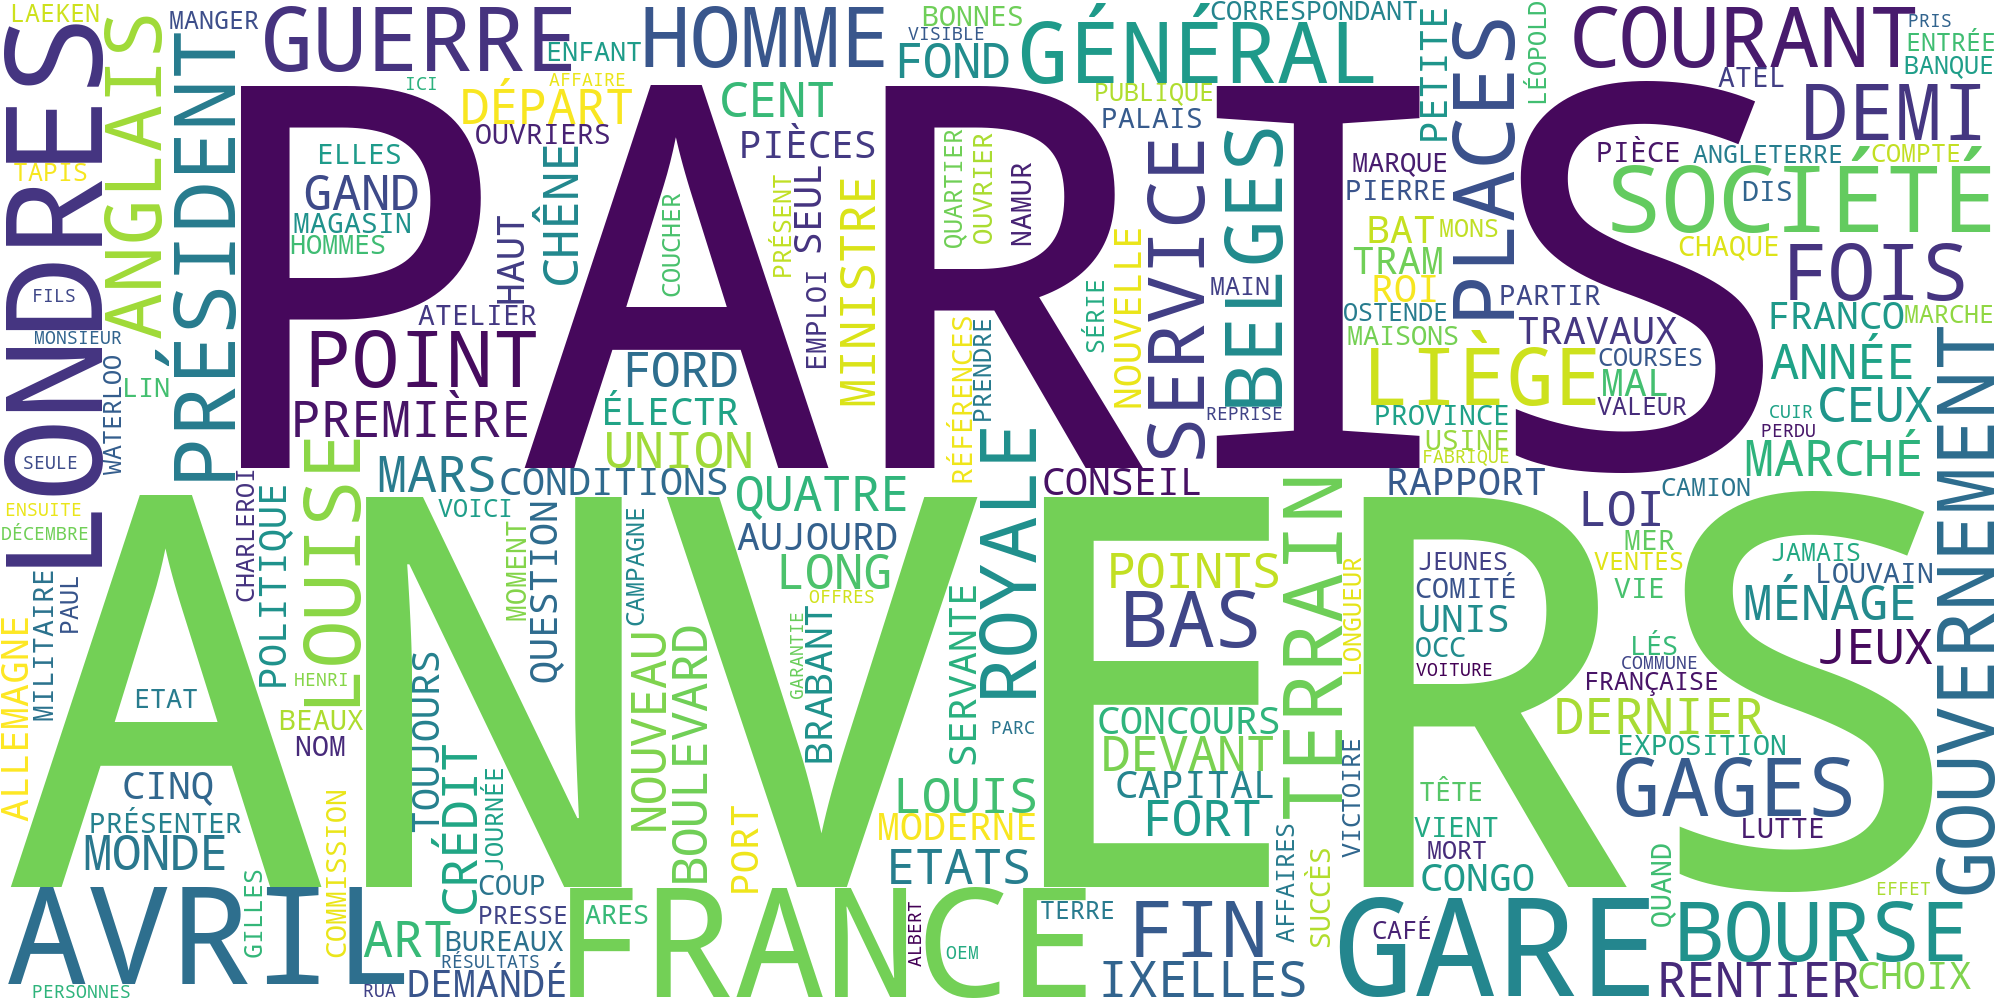

Année 1925 - 20 mots les plus fréquents : [('ANVERS', 345), ('PARIS', 336), ('GARE', 257), ('PREMIÈRE', 247), ('MARCHÉ', 236), ('CENT', 223), ('LOUISE', 209), ('SOCIÉTÉ', 206), ('POINT', 206), ('FOIS', 204), ('HOMME', 203), ('ART', 202), ('GUERRE', 199), ('DEVANT', 197), ('FRANCE', 194), ('PETITE', 194), ('GÉNÉRAL', 192), ('PLACES', 190), ('ROYALE', 188), ('MODERNE', 187)]


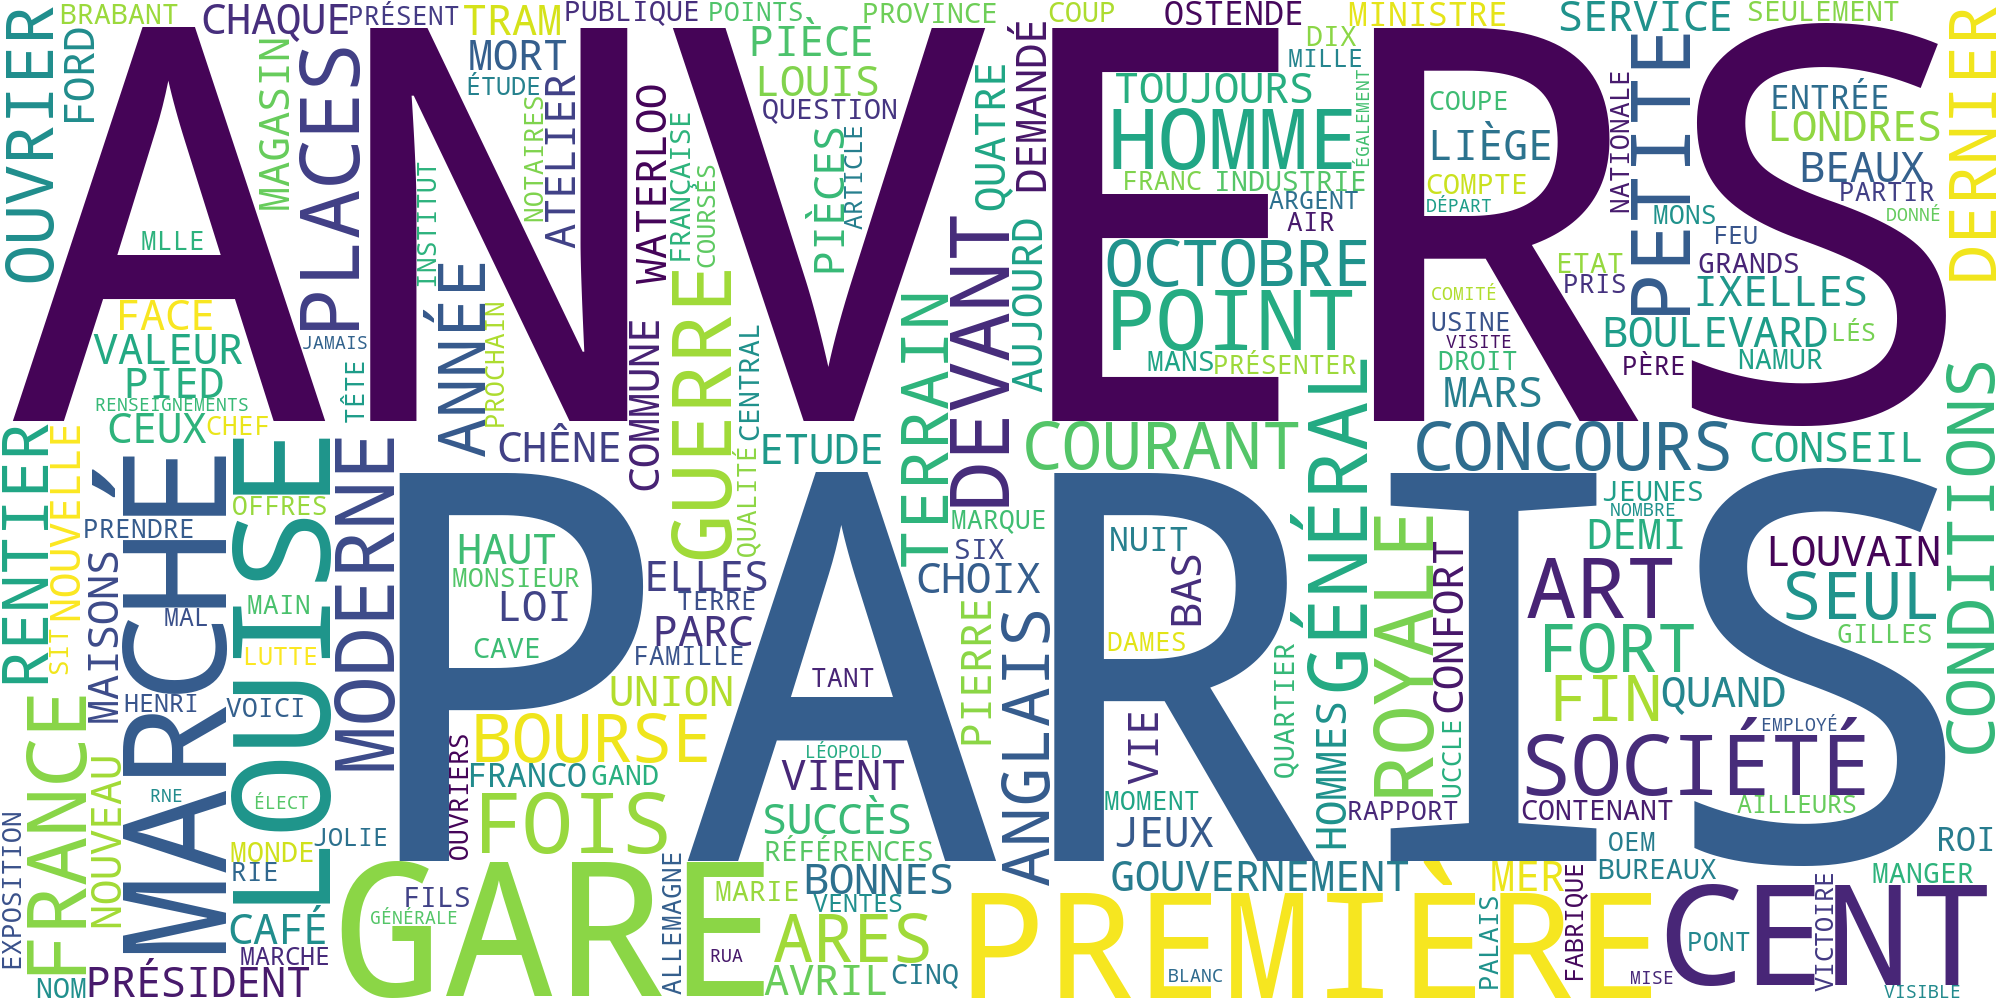

Année 1926 - 20 mots les plus fréquents : [('ANVERS', 411), ('PARIS', 378), ('LONDRES', 246), ('SOCIÉTÉ', 244), ('MARCHÉ', 240), ('GOUVERNEMENT', 237), ('BAS', 225), ('LOUISE', 222), ('AVRIL', 219), ('BOURSE', 217), ('GARE', 216), ('CENT', 214), ('GÉNÉRAL', 214), ('CONSEIL', 214), ('CHÊNE', 212), ('LIÈGE', 211), ('HOMME', 207), ('MINISTRE', 207), ('ART', 206), ('CAFÉ', 204)]


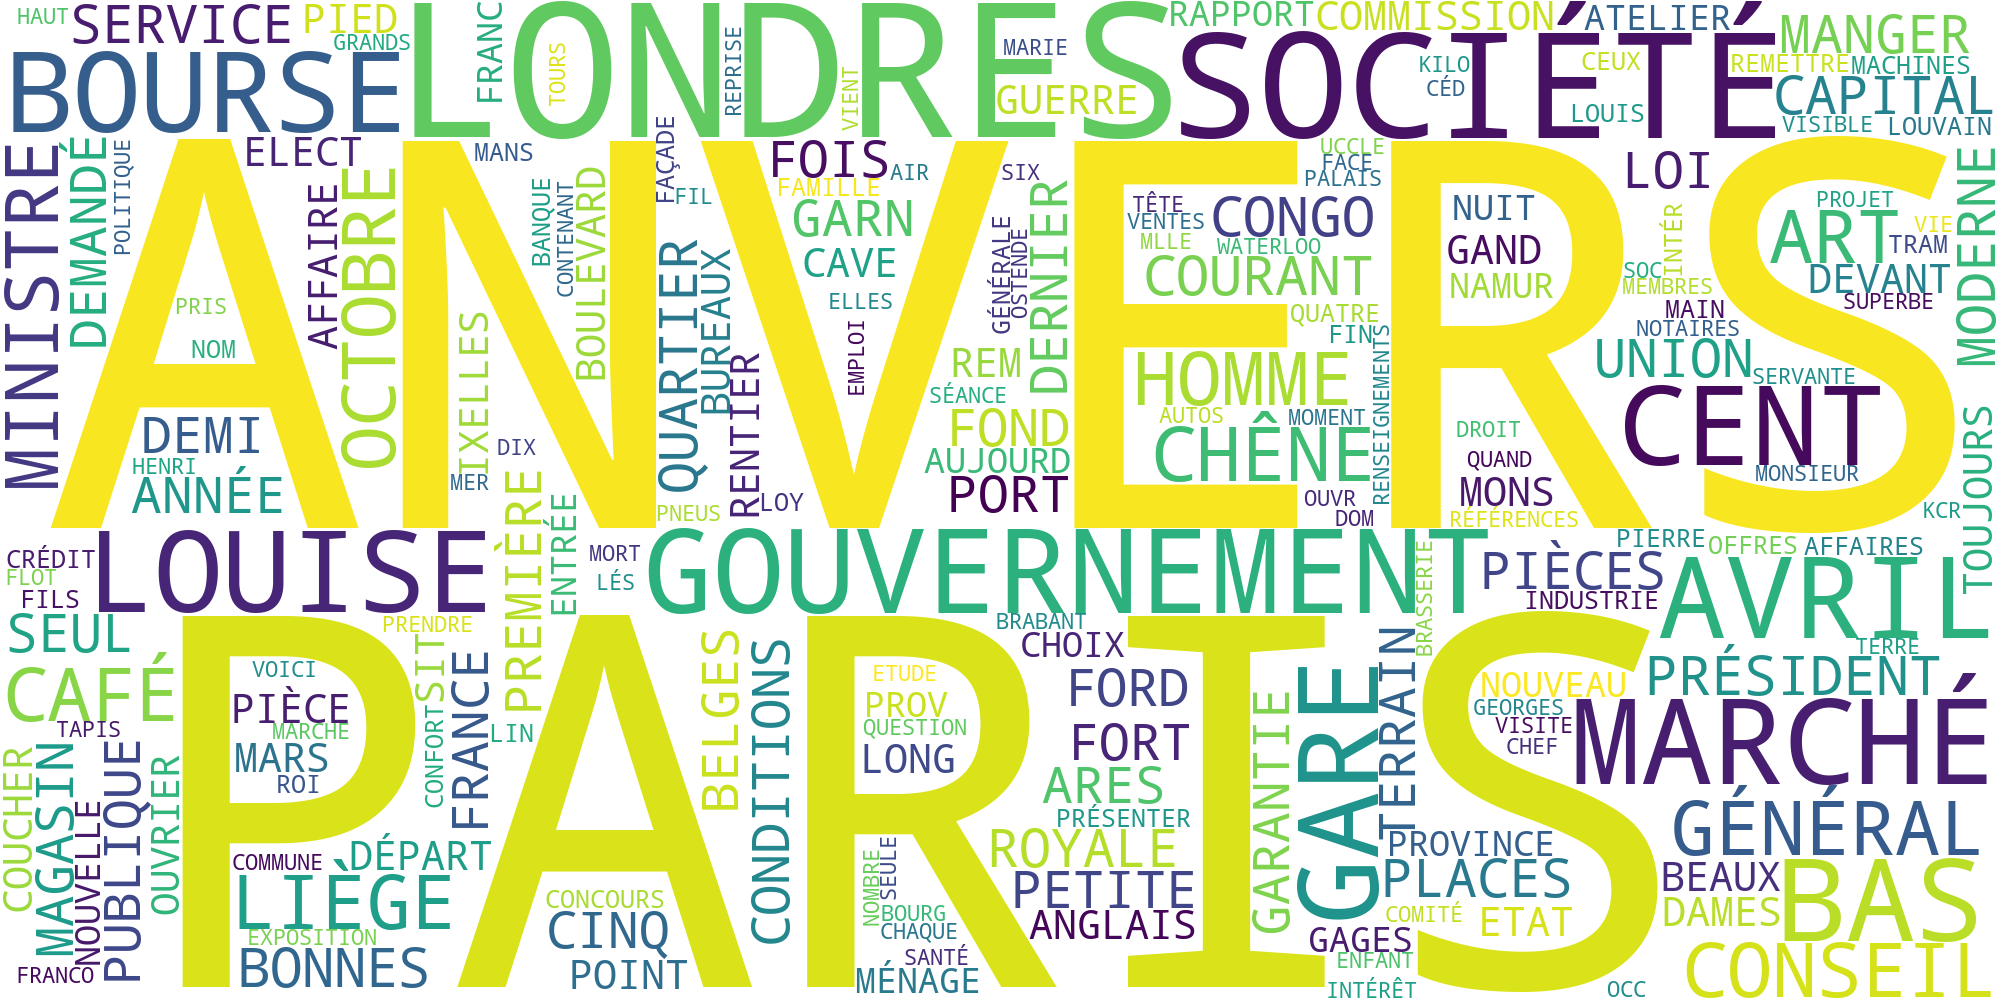

Année 1927 - 20 mots les plus fréquents : [('ANVERS', 501), ('CONGO', 357), ('PARIS', 351), ('CENT', 285), ('LOUISE', 280), ('BOURSE', 279), ('CONCERT', 255), ('PLACES', 254), ('IXELLES', 253), ('COURANT', 247), ('BAS', 237), ('PRIV', 234), ('PETITE', 227), ('GARE', 223), ('LIÈGE', 220), ('ART', 220), ('FRANCE', 220), ('SOCIÉTÉ', 220), ('CAPITAL', 218), ('HOMME', 218)]


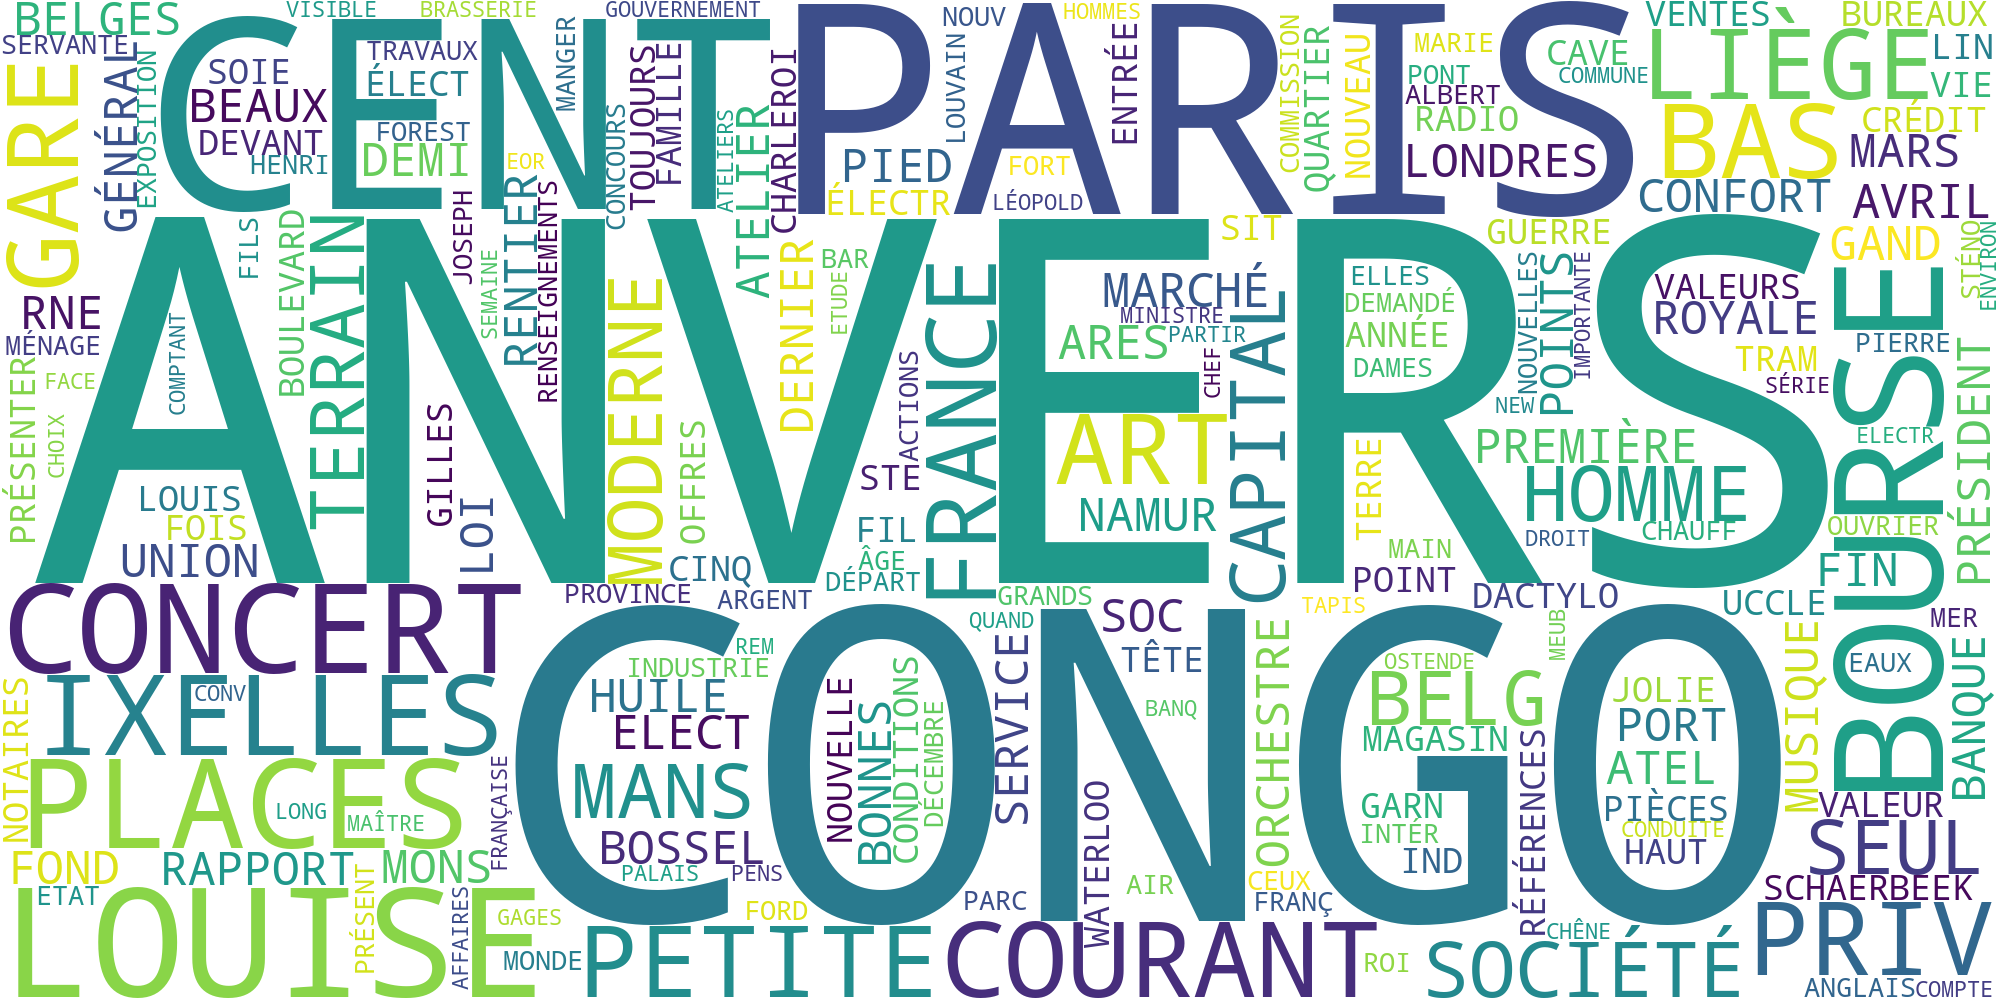

Année 1928 - 20 mots les plus fréquents : [('ANVERS', 430), ('PARIS', 338), ('PLACES', 264), ('CENT', 226), ('MARS', 225), ('COURANT', 223), ('BOULEVARD', 220), ('HOMME', 219), ('CONGO', 211), ('MAL', 208), ('PREMIÈRE', 206), ('AVRIL', 204), ('CONCOURS', 204), ('TERRAIN', 202), ('FRANCE', 202), ('MARCHÉ', 200), ('RÉFÉRENCES', 200), ('VENTES', 199), ('BAS', 197), ('PRÉSENTER', 197)]


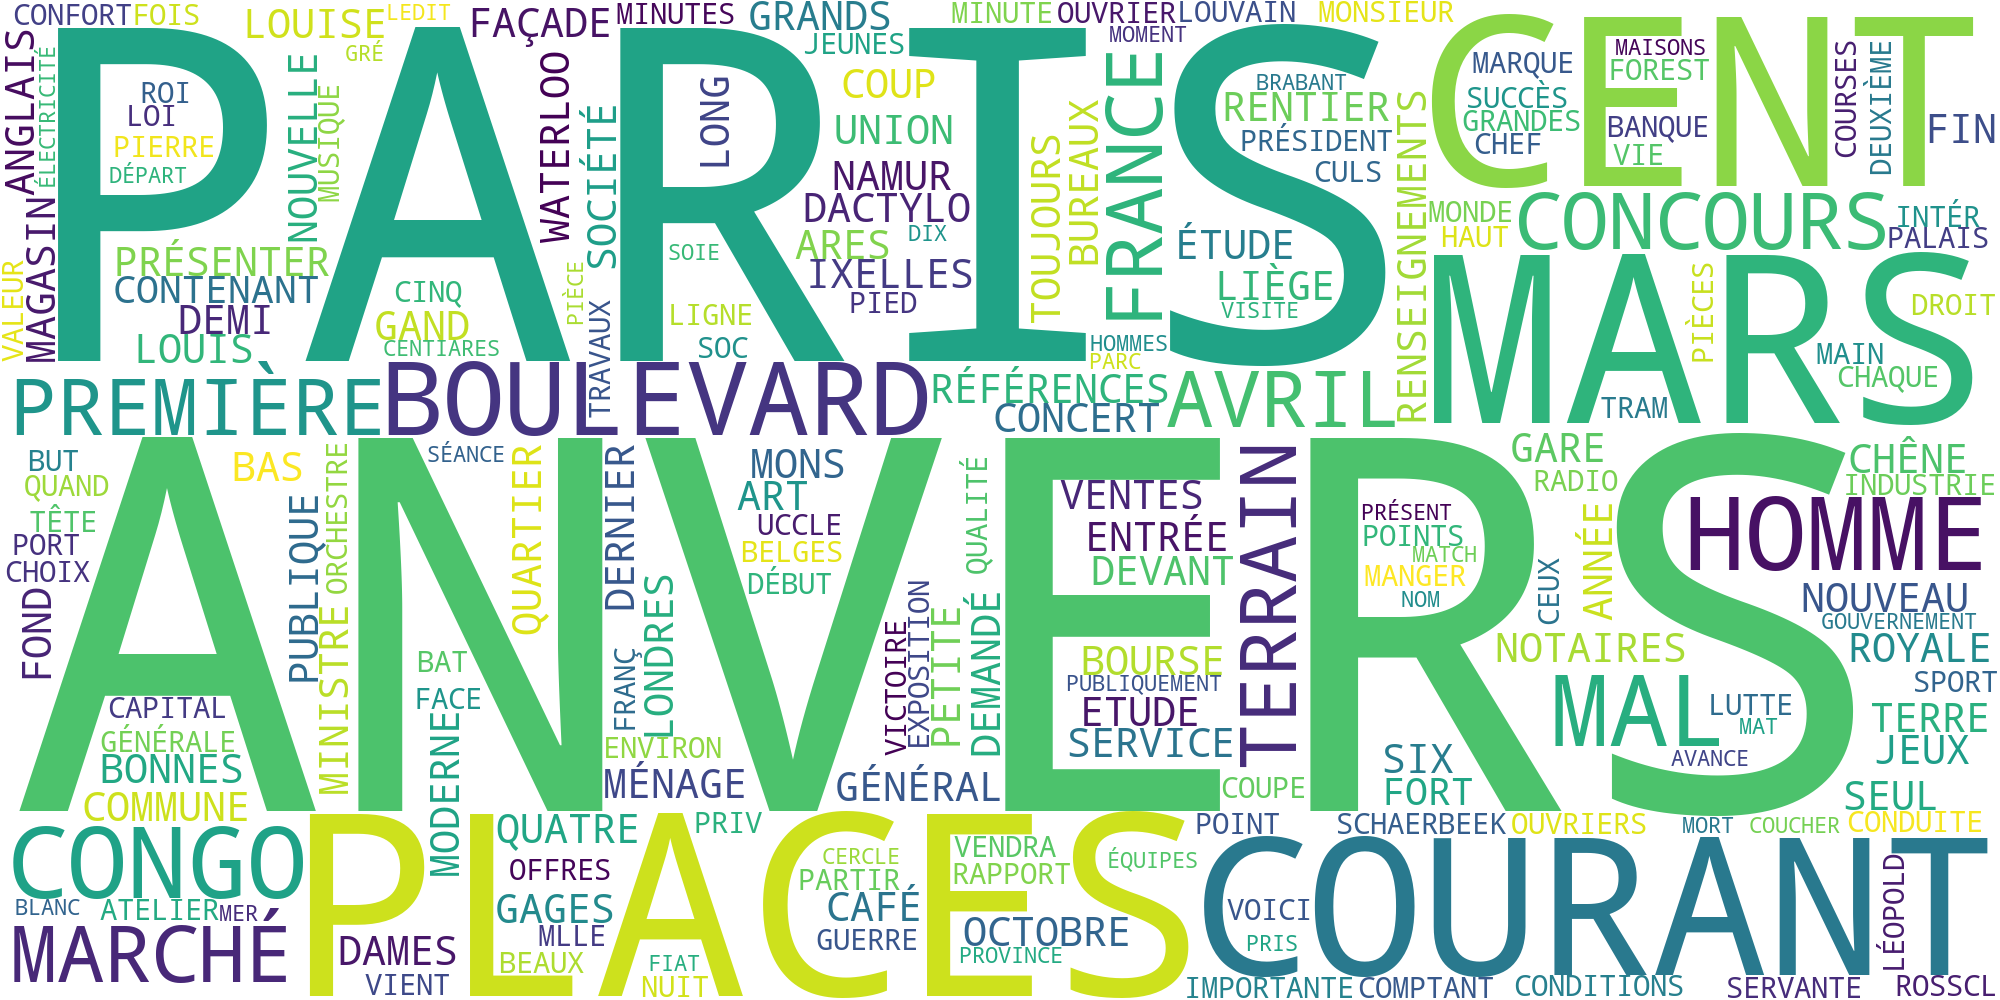

Année 1929 - 20 mots les plus fréquents : [('ANVERS', 518), ('PARIS', 375), ('SOCIÉTÉ', 312), ('PRÉSENTER', 281), ('COURANT', 281), ('BANQUE', 276), ('HOMME', 266), ('CENT', 264), ('CONGO', 263), ('FOND', 245), ('RÉFÉRENCES', 243), ('DCM', 243), ('CULS', 242), ('LOUISE', 241), ('DACTYLO', 241), ('LONDRES', 228), ('CONCERT', 225), ('MARCHÉ', 224), ('SERVANTE', 222), ('SERVICE', 221)]


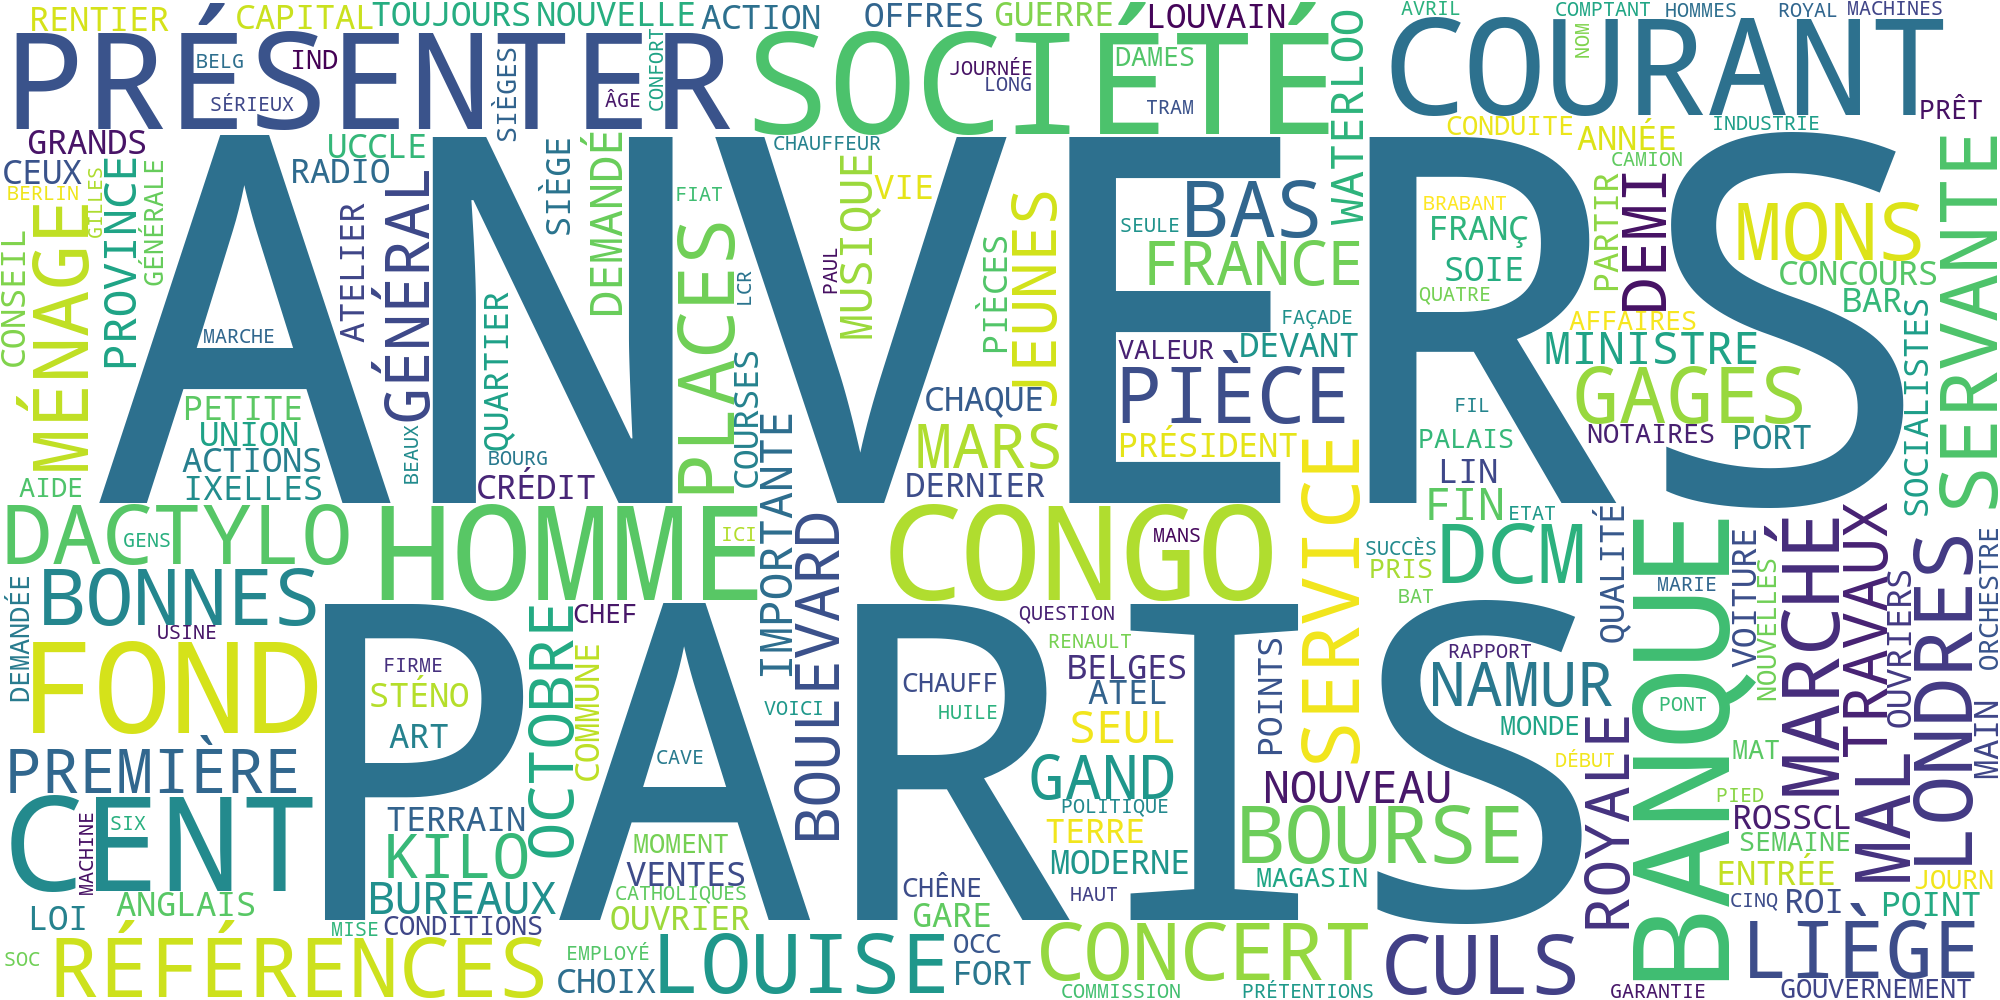

In [ ]:


# Fonction de nettoyage
def clean_text(text):
    words = nltk.wordpunct_tokenize(text)
    kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
    return " ".join(kept)

# Boucle sur les années 1920 à 1929
for year in range(1920, 1930):
    # Lister les fichiers de l'année
    txts = [f for f in os.listdir(txt_path) if f.endswith('.txt') and str(year) in f]
    
    
    # Combiner le contenu de tous les fichiers
    content_list = []
    for txt in txts:
        with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
            content_list.append(f.read())
    
    combined_text = " ".join(content_list)
    
    # Nettoyage
    cleaned_text = clean_text(combined_text)
    
    # Sauvegarder le texte nettoyé
    clean_file_path = os.path.join(temp_path, f"{year}_clean.txt")
    with open(clean_file_path, 'w', encoding='utf-8') as f:
        f.write(cleaned_text)
    
    # Calculer les fréquences
    frequencies = Counter(cleaned_text.split())
    print(f"Année {year} - 20 mots les plus fréquents : {frequencies.most_common(20)}")
    
    # Créer et sauvegarder le nuage de mots
    cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
    cloud_file = os.path.join(temp_path, f"{year}.png")
    cloud.to_file(cloud_file)
    
    # Afficher le nuage
    display(Image(filename=cloud_file))

In [59]:
# Instancier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)

# Dossier des fichiers
data_path = "../../data/txt/"
files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

# Boucle sur les années 1920-1929
for year in range(1920, 1930):
    # Lister les fichiers contenant l'année dans le nom
    year_files = [f for f in files if str(year) in f]
    
    if not year_files:
        print(f"Année {year} : aucun fichier trouvé.")
        continue
    
    # Combiner le texte de tous les fichiers de l'année
    combined_text = ""
    for f in year_files:
        with open(os.path.join(data_path, f), 'r', encoding='utf-8') as file:
            combined_text += " " + file.read()
    
    if not combined_text.strip():
        print(f"Année {year} : texte vide.")
        continue
    
    # Extraire les mots-clés avec YAKE
    keywords = kw_extractor.extract_keywords(combined_text)
    
    # Ne garder que les bigrammes
    bigrams = [kw for kw, score in keywords if len(kw.split()) == 2]
    
    # Afficher les bigrammes
    print(f"Année {year} - Top {len(bigrams)} bigrammes : {', '.join(bigrams)}")

Année 1920 - Top 13 bigrammes : Agence Rossel, rue Van, belle maison, rue Neuve, rue Royale, BONNE MAISON, bon état, nous nous, louer maison, VENDRE maison, jeune fille, MAISON rue, nous avons
Année 1921 - Top 10 bigrammes : Agence Rossel, rue Van, RUE ROYALE, jeune fille, rue Neuve, bon état, BELLE MAISON, Bons gages, COIFFEUR dem, demande bon
Année 1922 - Top 12 bigrammes : Agence Rossel, rue Van, belle maison, rue Royale, demande bon, rue Neuve, LOUER maison, bonne maison, Bruxelles demande, jeune fille, maison rue, rue Joseph
Année 1923 - Top 14 bigrammes : Agence Rossel, rue Van, DEMANDE bon, rue Royale, BRUXELLES Bruxelles, jeune fille, rue Neuve, BELLE MAISON, demande jeune, Bons gages, demande place, jeune homme, demande bonne, PARIS Paris
Année 1924 - Top 12 bigrammes : Agence RosseL, rue Van, rue Royale, BELLE MAISON, rue Neuve, bon état, LOUER maison, bons gages, VENDRE Maison, DEMANDE bon, BRUXELLES DEMANDE, BONNE MAISON
Année 1925 - Top 8 bigrammes : Agence Rossel, rue Van

In [44]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=50, n=3, stopwords=sw)

# --- Extraction des mots-clés par cluster ---
cluster_keywords = {}

data_path = "../../data/txt/"  # dossier où se trouvent les fichiers texte

for cluster, file_list in clustering.items():
    # Combiner le texte de tous les fichiers du cluster
    full_text = ""
    for f in file_list:
        with open(os.path.join(data_path, f), 'r', encoding='utf-8') as file:
            full_text += " " + file.read()
    
    # Extraire les mots-clés
    keywords = kw_extractor.extract_keywords(full_text)
    
    # Séparer unigrams et bigrams
    unigrams = [kw for kw, score in keywords if len(kw.split()) == 1]
    bigrams  = [kw for kw, score in keywords if len(kw.split()) == 2]
    
    # Fallback si pas assez
    if not unigrams:
        unigrams = [kw for kw, score in keywords[:10] if len(kw.split()) >= 1]
    if not bigrams:
        bigrams = [kw for kw, score in keywords[:10] if len(kw.split()) >= 1]
    
    # Top 10
    cluster_keywords[cluster] = {
        "unigrams": unigrams[:10],
        "bigrams": bigrams[:10]
    }

# --- Affichage ---
print("\nMots-clés par cluster :\n")
for cluster in sorted(cluster_keywords.keys()):
    print(f"Cluster {cluster}:")
    print("  Top Unigrams:", ", ".join(cluster_keywords[cluster]["unigrams"]))
    print("  Top Bigrams :", ", ".join(cluster_keywords[cluster]["bigrams"]))
    print()


Mots-clés par cluster :

Cluster 0:
  Top Unigrams: LOUER, RUE, Maison
  Top Bigrams : Agence Rossel, rue des, louer maison, louer pour, belle maison, LOUER bel, VENDRE maison, louer belle, louer mais

Cluster 1:
  Top Unigrams: rue, vendre, BRUXELLES, prix, pour, Rossel, des, AGENCE, vend
  Top Bigrams : Agence Rossel, rue des, rue Van, POUR cause, état neuf, des prix, bas prix, rue Neuve, Bruxelles Immobilier, bon état

Cluster 2:
  Top Unigrams: rue, vendre, prix, état, Bruxelles, des, VEND, torpédo, pour
  Top Bigrams : RUE des, état neuf, bon état, rue Van, Bon piano, VENDRE torpédo, des prix, Agence Rossel, bas prix, vendre pour

Cluster 3:
  Top Unigrams: des, que, qui, dans, une, pour, par, est, sur, pas
  Top Bigrams : dans une, qui est, pour que, par des, que vous, une des, que nous, que des, que dans, dans son

Cluster 4:
  Top Unigrams: des, une, que, pour, dans, PAR, qui, BRUXELLES
  Top Bigrams : dans une, rue des, par des, par une, que des, DANS DES, qui est, Une des, d